In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data as t_data
import torchvision.datasets as datasets
from torchvision import transforms

In [3]:
data_transforms = transforms.Compose([transforms.ToTensor()])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=data_transforms)
batch_size=4
dataloader_mnist_train = t_data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
def make_some_noise():
    return torch.rand(batch_size,100)

In [0]:
# defining generator class

class generator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(generator, self).__init__()
        
        self.net = nn.Sequential(
            nn.Linear(inp,500),
            nn.ReLU(inplace=True),
            nn.Linear(500, 2000),
            nn.ReLU(inplace=True),
            nn.Linear(2000,1000),
            nn.ReLU(inplace=True),
            nn.Linear(1000,out)
        )
        
    def forward(self, x):
        x = self.net(x)
        return x

In [0]:
# defining discriminator class

class discriminator(nn.Module):
    
    def __init__(self, inp, out):
        
        super(discriminator, self).__init__()
        
        self.net = nn.Sequential(
            nn.Linear(inp,500),
            nn.ReLU(inplace=True),
            nn.Linear(500,500),
            nn.ReLU(inplace=True),
            nn.Linear(500,250),
            nn.ReLU(inplace=True),
            nn.Linear(250,out),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.net(x)
        return x

In [0]:
def plot_img(array,number=None):
    array = array.detach()
    array = array.reshape(28,28)
    
    plt.imshow(array,cmap='binary')
    plt.xticks([])
    plt.yticks([])
    if number:
        plt.xlabel(number,fontsize='x-large')
    plt.show()

In [0]:
dis = discriminator(784, 1)
gen = generator(100, 784)

d_steps = 100
g_steps = 100

criteriond1 = nn.BCELoss()
optimizerd1 = optim.SGD(dis.parameters(), lr=0.005, momentum=0.8)

criteriond2 = nn.BCELoss()
optimizerd2 = optim.SGD(gen.parameters(), lr=0.005, momentum=0.8)

printing_steps = 5

epochs = 20

Epoch: 0


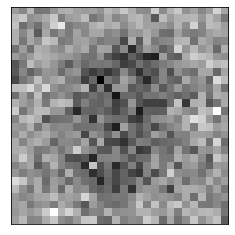

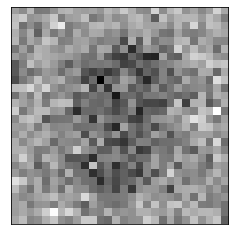

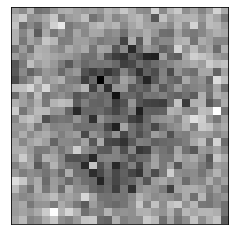

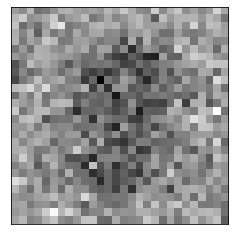




Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5


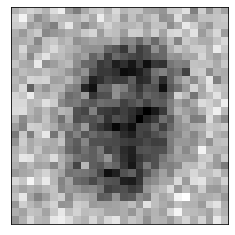

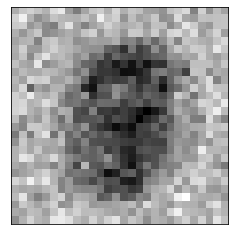

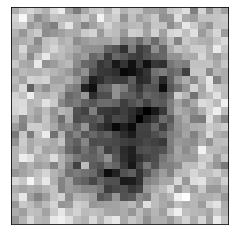

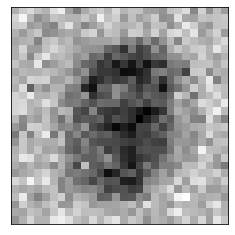




Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


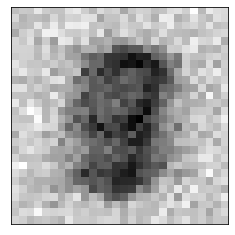

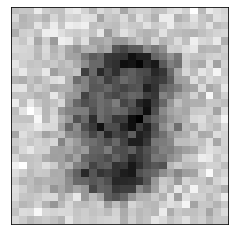

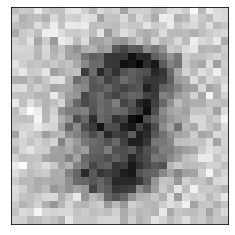

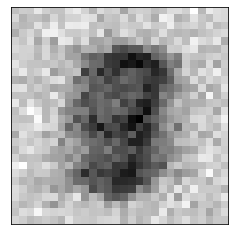




Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15


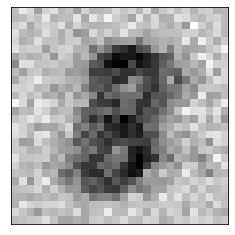

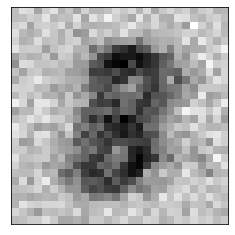

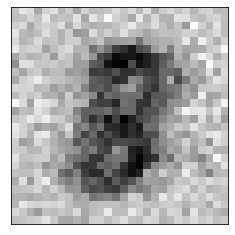

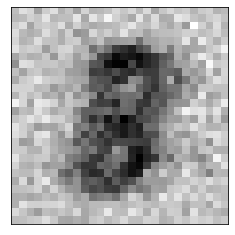




Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19


In [52]:
for epoch in range(epochs):
    
    print("Epoch: %d" %epoch)

    # training discriminator
    for d_step in range(d_steps):
        dis.zero_grad()
        
        # training discriminator on real data
        for inp_real,_ in dataloader_mnist_train:
            inp_real_x = inp_real
            break

        inp_real_x = inp_real_x.reshape(batch_size,784)
        dis_real_out = dis(inp_real_x)
        dis_real_loss = criteriond1(dis_real_out, Variable(torch.ones(batch_size,1)))
        dis_real_loss.backward()

        # training discriminator on data produced by generator
        inp_fake_x_gen = make_some_noise()
        #output from generator is generated        
        dis_inp_fake_x = gen(inp_fake_x_gen).detach()
        dis_fake_out = dis(dis_inp_fake_x)
        dis_fake_loss = criteriond1(dis_fake_out, Variable(torch.zeros(batch_size,1)))
        dis_fake_loss.backward()

        optimizerd1.step()
        
        
            
    # training generator
    for g_step in range(g_steps):
        gen.zero_grad()
        
        #generating data for input for generator
        gen_inp = make_some_noise()
        
        gen_out = gen(gen_inp)
        dis_out_gen_training = dis(gen_out)
        gen_loss = criteriond2(dis_out_gen_training, Variable(torch.ones(batch_size,1)))
        gen_loss.backward()
        
        optimizerd2.step()
        
    if epoch%printing_steps == 0:
        plot_img(gen_out[0])
        plot_img(gen_out[1])
        plot_img(gen_out[2])
        plot_img(gen_out[3])
        print("\n\n")

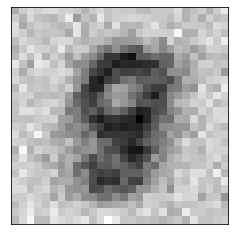

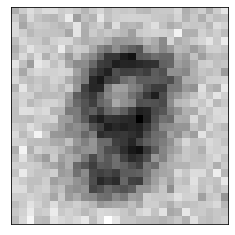

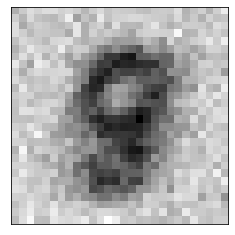

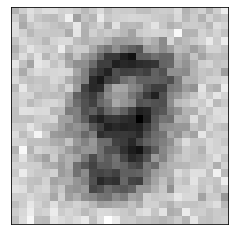

In [53]:
gen_op = gen(make_some_noise())
for i in range(4):
    plot_img(gen_op[i])